In [79]:
import pickle as pkl
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

import os
import sys

os.environ['CUDA_VISIBLE_DEVICES'] = ''
sys.path.append('..')

from evaluate import get_last_N, get_predictions, evaluate_model_ensembles

%matplotlib inline

In [80]:
df_full = pd.read_csv('../reports/result_df.csv')
print(df_full.shape)
df = df_full[df_full['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']
print(df.shape)

(2710, 9)
(159, 8)


In [81]:
x, y = pkl.load(open('../data/yearly_24_train_line.pkl', 'rb'))

x.shape, y.shape

((176595, 18), (176595, 6))

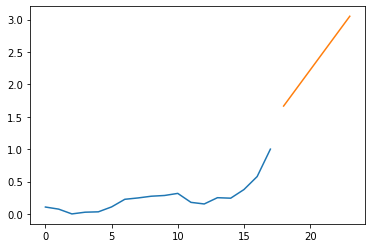

In [82]:
i = 8
plt.plot(range(18), x[i])
plt.plot(range(18, 24), y[i])

In [83]:
# Read test data
train_path = Path('../data/Yearly-train.csv')
test_path = Path('../data/Yearly-test.csv')

train = pd.read_csv(train_path).drop('V1', axis=1)
test = pd.read_csv(test_path).drop('V1', axis=1)

In [84]:
# Read experiments
p = Path('../results').absolute()

trials = [t for t in p.glob('*') if t.name.startswith('line')]
families = set([p / '__'.join(t.name.split('__')[:-1]) for t in trials])
num_models = [len(list(p.glob(f.name + '*'))) for f in families]

num_inputs = np.unique([f.name[10:12] for f in families])

In [85]:
for inp in num_inputs:
    X_test = np.array([get_last_N(ser[1], N=int(inp)) for ser in train.iterrows()])
    y_test = test.values

    curr_family_list = [(f, m) for f, m in zip(families, num_models) if f.name[10:12] == inp]

    results = evaluate_model_ensembles(curr_family_list, X_test, y_test)

100%|██████████| 2/2 [19:18<00:00, 579.06s/it]


In [86]:
results['smape']

{'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__0': 13.166046679319738,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__1': 13.27679715802299,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__2': 13.094774175255164,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__3': 13.226936539920262,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__4': 13.153242687603031,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__5': 13.10424919806909,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__6': 13.257587730543992,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__7': 13.063778438262778,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__8': 13.181133358748715,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__9': 13.518153157954242,
 'line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi__10': 13.22858879679163,
 'line__inp_

Text(0.5, 1.0, 'Ensembles with:\nInput: 18 and Output: 12')

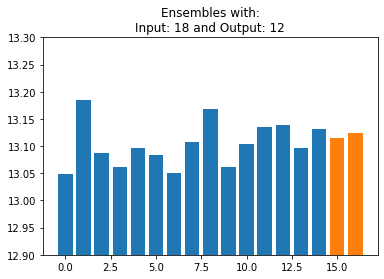

In [94]:
r = list(df[(df['input_len'] == 18) & (df['output_len'] == 14)]['smape']) \
+ [results['smape']['line__inp_18__out_12__loss_mae__bksize_200__bkact_relu__dir_bi']] \
+ [results['smape']['line__inp_18__out_12__loss_mae__bksize_250__bkact_relu__dir_bi']]

colors = ['C0'] * (len(r) - 2) + ['C1'] * 2

plt.bar(range(len(r)), height=r, color=colors)
plt.ylim([12.9, 13.3])
plt.title('Ensembles with:\nInput: 18 and Output: 12')

In [102]:
a = df_full[(df_full['input_len'] == 18) & (df_full['output_len'] == 12) & (df_full['bottleneck_size'] == 200) & 
            (df_full['bottleneck_activation'] == 'relu') & (df_full['LSTM_type'] == 'bi') & (df_full['loss'] == 'mae')].dropna()

In [103]:
a['out_type'] = 'regular'
b = a[['out_type', 'smape']]

In [104]:
c = pd.DataFrame({'out_type': ['line']*30, 'smape': pd.DataFrame(results)[:30]['smape'].values})

Text(0.5, 1.0, 'Input: 18 - Output: 12 - Bottleneck: 200')

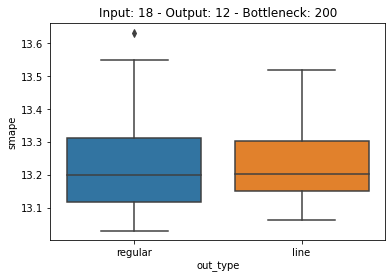

In [105]:
sns.boxplot(x='out_type', y='smape', data=pd.concat([b, c]))
plt.title('Input: 18 - Output: 12 - Bottleneck: 200')

Text(0.5, 1.0, 'Input: 18 - Output: 12 - Bottleneck: 250')

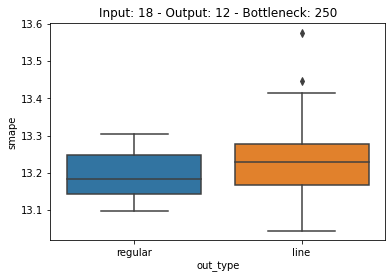

In [101]:
a = df_full[(df_full['input_len'] == 18) & (df_full['output_len'] == 14) & (df_full['bottleneck_size'] == 250) & 
            (df_full['bottleneck_activation'] == 'relu') & (df_full['LSTM_type'] == 'bi') & (df_full['loss'] == 'mae')].dropna()
a['out_type'] = 'regular'
b = a[['out_type', 'smape']]
c = pd.DataFrame({'out_type': ['line']*30, 'smape': pd.DataFrame(results)[31:-1]['smape'].values})

sns.boxplot(x='out_type', y='smape', data=pd.concat([b, c]))
plt.title('Input: 18 - Output: 12 - Bottleneck: 250')